In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


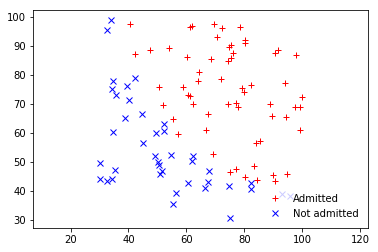

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y
W = np.random.random((1, 3))

def h(X, w):
    return np.dot(w, X)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, w):
    return sigmoid(h(X, w))

def costF(X, Y, w):
    #return np.sum(-Y*np.log(hypothesis(X, w)) - (1-Y)*(np.log(1-hypothesis(X, w)))) / n_samples
    return -(np.dot(np.log(hypothesis(X, w)), Y.T) + np.dot(np.log(1 - hypothesis(X, w)), (1 - Y).T)) / n_samples
    
def gradientDescent(X, Y, w, alpha, num_iters):
    #print w, np.dot(X, (hypothesis(X, w) - Y).T) / n_samples
    for i in xrange(num_iters):
        #for j in xrange(w.size):
            #w[0,j] -= np.sum(np.multiply(hypothesis(temp_X, W) - temp_Y, temp_X[j,:])) * alpha / n_samples
        w -= (np.dot(X, (hypothesis(X, w) - Y).T) / n_samples).T * alpha / n_samples
        if i % 1000 == 0:
            print i, w, costF(X, Y, w)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.015, 2000001)

0 [[ 0.09500579  0.72191085  0.31620871]] [ nan]
1000 [[ 0.07682561  0.00996327 -0.00021401]] [ 0.63520689]
2000 [[  6.62588879e-02   9.96599886e-03  -6.32262923e-05]] [ 0.63446204]
3000 [[  5.57057640e-02   1.00391173e-02   1.87331271e-05]] [ 0.6337195]
4000 [[ 0.04516627  0.01011215  0.00010059]] [ 0.63297888]
5000 [[ 0.03464038  0.01018511  0.00018236]] [ 0.63224018]
6000 [[ 0.02412809  0.01025798  0.00026402]] [ 0.63150338]
7000 [[ 0.01362938  0.01033078  0.00034558]] [ 0.63076848]
8000 [[ 0.00314424  0.01040349  0.00042705]] [ 0.63003548]
9000 [[-0.00732736  0.01047612  0.00050842]] [ 0.62930437]
10000 [[-0.01778543  0.01054867  0.00058969]] [ 0.62857515]
11000 [[-0.02822998  0.01062113  0.00067086]] [ 0.62784781]
12000 [[-0.03866104  0.01069352  0.00075193]] [ 0.62712235]
13000 [[-0.04907861  0.01076582  0.0008329 ]] [ 0.62639877]
14000 [[-0.05948272  0.01083805  0.00091378]] [ 0.62567706]
15000 [[-0.06987338  0.01091019  0.00099456]] [ 0.62495721]
16000 [[-0.0802506   0.01098225

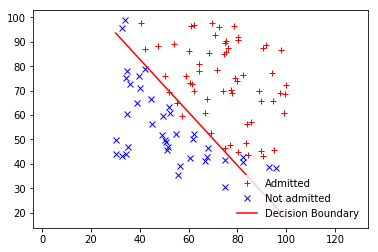

In [5]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./W[0,2])*(W[0,0] + W[0,1]*x)

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')